In [0]:
!pip install albumentations==0.4.5

In [0]:
import data_loader_alb
from resnet import ResNet18
from utils import model_summary, plot_logs, best_lr, plot_misclassified, to_tensor

In [0]:
from train import train_model
from gradcam import GradDisplay
from lr_finder import LRFinder

In [0]:
from torch import nn
import torch.optim as optim
import torch

In [34]:
trainloader, testloader, classes = data_loader_alb.cifar10()
net = ResNet18()

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


In [35]:
device = model_summary(net, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [0]:
#saving the initial weights to run multiple lr finding iterations
torch.save(model.state_dict(), 'weights_only.pth')


Learning rate search finished. See the graph with {finder_name}.plot()


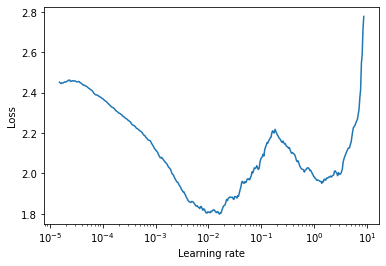


Learning rate search finished. See the graph with {finder_name}.plot()


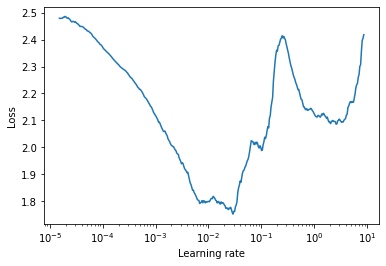


Learning rate search finished. See the graph with {finder_name}.plot()


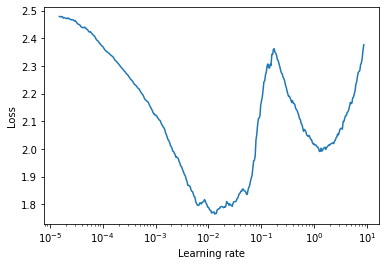


Learning rate search finished. See the graph with {finder_name}.plot()


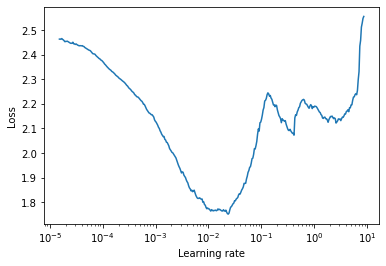


Learning rate search finished. See the graph with {finder_name}.plot()


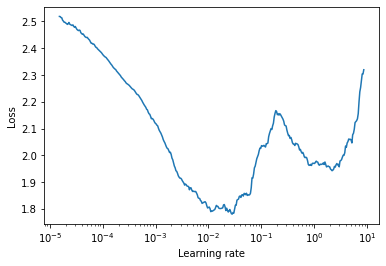


Learning rate search finished. See the graph with {finder_name}.plot()


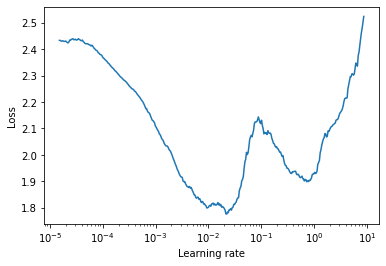


Learning rate search finished. See the graph with {finder_name}.plot()


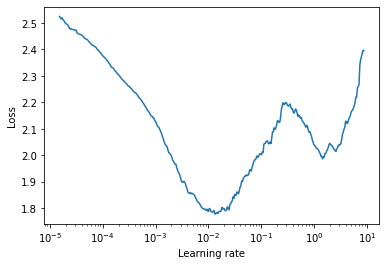


Learning rate search finished. See the graph with {finder_name}.plot()


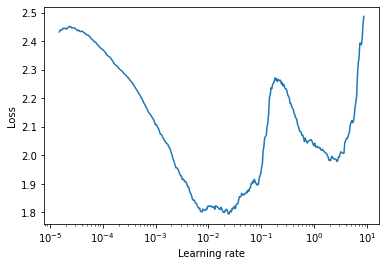


Learning rate search finished. See the graph with {finder_name}.plot()


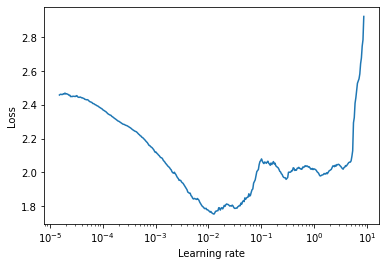


Learning rate search finished. See the graph with {finder_name}.plot()


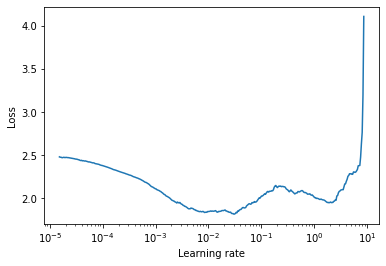

In [0]:
lrs=[]
for i in range(10):
  model.load_state_dict(torch.load('weights_only.pth'))#loading the same weights for every iteration
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model.parameters(), lr=1e-5, momentum=0.9)
  lr_finder = LRFinder(model, optimizer, criterion, device=device)
  lr_finder.range_test(trainloader, end_lr=10, num_iter=400)
  lr_finder.plot() # to inspect the loss-learning rate graph
  lr_finder.reset()
  lrs.append(best_lr(lr_finder))

In [0]:
#taking the mean of all the lrs
best_lr = sum(lrs)/10
print(best_lr)

0.021373092050140877

In [0]:
best_lr = 0.021373092050140877

In [37]:
#loading the same initial weights for which, we found the best lr
net.load_state_dict(torch.load('weights_only.pth'))

<All keys matched successfully>

In [38]:
trainer = train_model(trainloader, testloader, device)
logs, misclassified_images = trainer.run_model(net, lr = best_lr, epochs=25, patience=5, sch=True)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.1652424335479736 Batch_id=390 Accuracy=44.52: 100%|██████████| 391/391 [03:26<00:00,  1.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1638, Accuracy: 5790/10000 (57.90%)

EPOCH: 2


Loss=1.0855952501296997 Batch_id=390 Accuracy=63.36: 100%|██████████| 391/391 [03:30<00:00,  1.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8646, Accuracy: 6947/10000 (69.47%)

EPOCH: 3


Loss=0.8568914532661438 Batch_id=390 Accuracy=71.90: 100%|██████████| 391/391 [03:27<00:00,  1.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8106, Accuracy: 7281/10000 (72.81%)

EPOCH: 4


Loss=0.7294504642486572 Batch_id=390 Accuracy=76.21: 100%|██████████| 391/391 [03:29<00:00,  1.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6492, Accuracy: 7754/10000 (77.54%)

EPOCH: 5


Loss=0.4499596059322357 Batch_id=390 Accuracy=78.91: 100%|██████████| 391/391 [03:26<00:00,  1.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6039, Accuracy: 7980/10000 (79.80%)

EPOCH: 6


Loss=0.501390278339386 Batch_id=390 Accuracy=81.20: 100%|██████████| 391/391 [03:31<00:00,  1.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6198, Accuracy: 7965/10000 (79.65%)

EPOCH: 7


Loss=0.44712257385253906 Batch_id=390 Accuracy=83.14: 100%|██████████| 391/391 [03:27<00:00,  1.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5316, Accuracy: 8275/10000 (82.75%)

EPOCH: 8


Loss=0.44241270422935486 Batch_id=390 Accuracy=84.31: 100%|██████████| 391/391 [03:30<00:00,  1.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4849, Accuracy: 8375/10000 (83.75%)

EPOCH: 9


Loss=0.24041113257408142 Batch_id=390 Accuracy=85.78: 100%|██████████| 391/391 [03:28<00:00,  1.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4743, Accuracy: 8404/10000 (84.04%)

EPOCH: 10


Loss=0.3025631308555603 Batch_id=390 Accuracy=87.19: 100%|██████████| 391/391 [03:30<00:00,  1.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4563, Accuracy: 8532/10000 (85.32%)

EPOCH: 11


Loss=0.34685462713241577 Batch_id=390 Accuracy=88.02: 100%|██████████| 391/391 [03:27<00:00,  1.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4940, Accuracy: 8470/10000 (84.70%)

EPOCH: 12


Loss=0.24817490577697754 Batch_id=390 Accuracy=88.91: 100%|██████████| 391/391 [03:30<00:00,  1.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5058, Accuracy: 8465/10000 (84.65%)

EPOCH: 13


Loss=0.2900281846523285 Batch_id=390 Accuracy=89.92: 100%|██████████| 391/391 [03:27<00:00,  1.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5459, Accuracy: 8322/10000 (83.22%)

EPOCH: 14


Loss=0.26555630564689636 Batch_id=390 Accuracy=90.48: 100%|██████████| 391/391 [03:30<00:00,  1.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5098, Accuracy: 8495/10000 (84.95%)

EPOCH: 15


Loss=0.262217253446579 Batch_id=390 Accuracy=90.95: 100%|██████████| 391/391 [03:26<00:00,  1.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5407, Accuracy: 8458/10000 (84.58%)

EPOCH: 16


Loss=0.31377798318862915 Batch_id=390 Accuracy=91.59: 100%|██████████| 391/391 [03:29<00:00,  1.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5156, Accuracy: 8605/10000 (86.05%)

EPOCH: 17


Loss=0.1026381403207779 Batch_id=390 Accuracy=94.76: 100%|██████████| 391/391 [03:28<00:00,  1.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3539, Accuracy: 8969/10000 (89.69%)

EPOCH: 18


Loss=0.09607689082622528 Batch_id=390 Accuracy=95.70: 100%|██████████| 391/391 [03:30<00:00,  1.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3525, Accuracy: 8967/10000 (89.67%)

EPOCH: 19


Loss=0.04467569664120674 Batch_id=390 Accuracy=96.11: 100%|██████████| 391/391 [03:26<00:00,  1.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3529, Accuracy: 8991/10000 (89.91%)

EPOCH: 20


Loss=0.13403458893299103 Batch_id=390 Accuracy=96.35: 100%|██████████| 391/391 [03:28<00:00,  1.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3630, Accuracy: 8975/10000 (89.75%)

EPOCH: 21


Loss=0.07387445867061615 Batch_id=390 Accuracy=96.48: 100%|██████████| 391/391 [03:27<00:00,  1.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3620, Accuracy: 9001/10000 (90.01%)

EPOCH: 22


Loss=0.1120278611779213 Batch_id=390 Accuracy=96.64: 100%|██████████| 391/391 [03:30<00:00,  1.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3685, Accuracy: 8984/10000 (89.84%)

EPOCH: 23


Loss=0.094234399497509 Batch_id=390 Accuracy=96.80: 100%|██████████| 391/391 [03:28<00:00,  1.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3693, Accuracy: 8994/10000 (89.94%)

EPOCH: 24


Loss=0.12002589553594589 Batch_id=390 Accuracy=96.85: 100%|██████████| 391/391 [03:32<00:00,  1.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3709, Accuracy: 8994/10000 (89.94%)

EPOCH: 25


Loss=0.08383674919605255 Batch_id=390 Accuracy=97.13: 100%|██████████| 391/391 [03:28<00:00,  1.87it/s]



Test set: Average loss: 0.3646, Accuracy: 9001/10000 (90.01%)



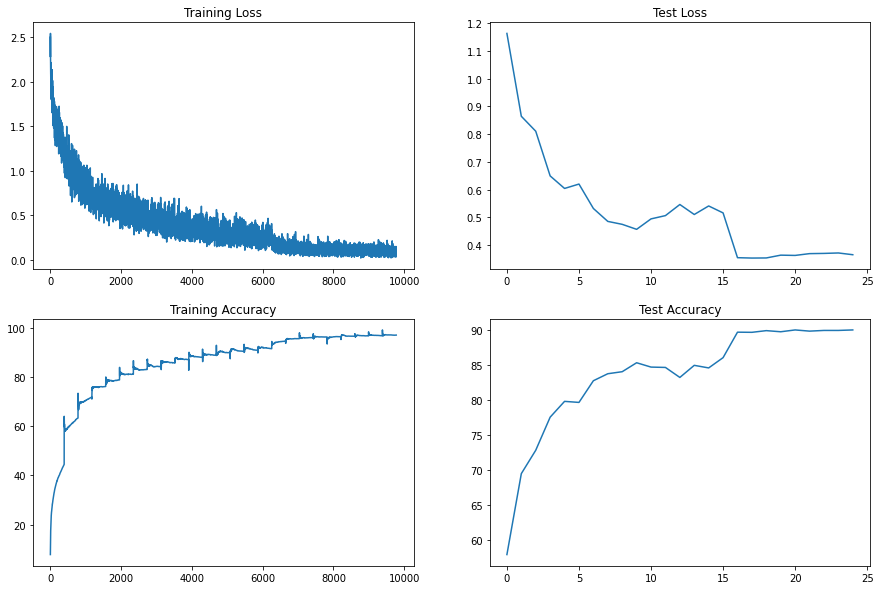

In [39]:
plot_logs(logs)

In [0]:
mean=tuple([0.4914, 0.48216, 0.44653])
std=tuple([0.24703, 0.24349, 0.26159])

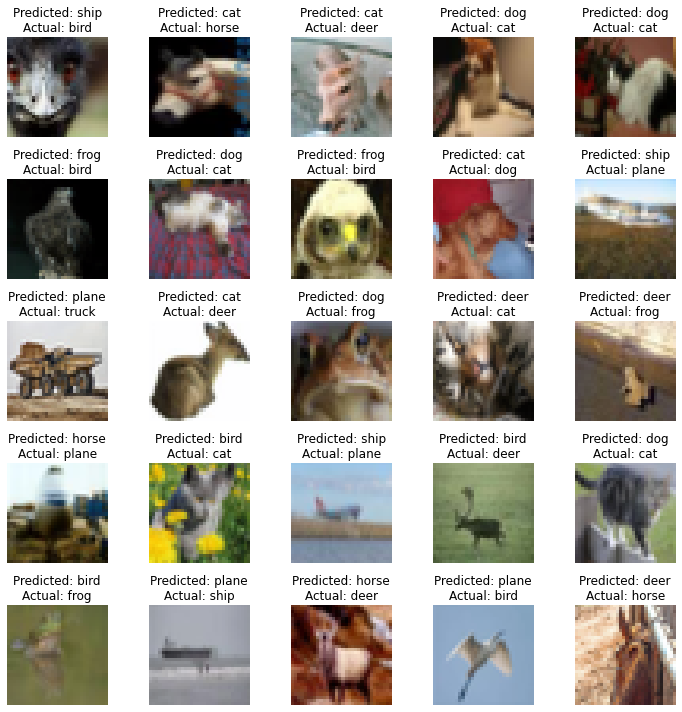

In [41]:
#plotting misclassified images
plot_misclassified("misclassified", mean, std, misclassified_images, classes)

In [0]:
#extracting images from misclassified_images, which also contains labels
images = []
pred = []
targ = []
num_of_images = len(misclassified_images)
for index in range(num_of_images):
    img = to_tensor(misclassified_images[index - 1]["img"])
    images.append(img)
    pred.append(classes[misclassified_images[index - 1]["pred"]])
    targ.append(classes[misclassified_images[index - 1]["target"]])

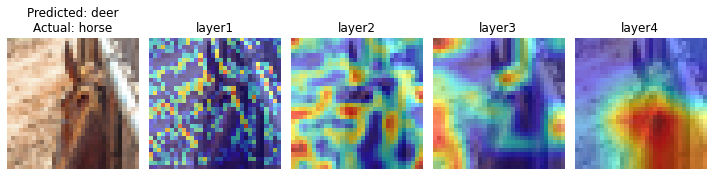

<Figure size 432x288 with 0 Axes>

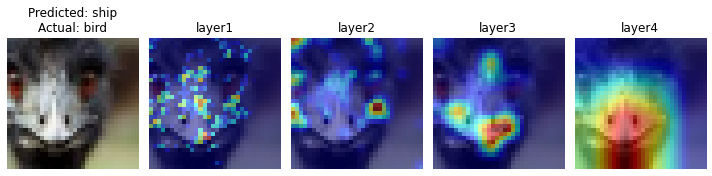

<Figure size 432x288 with 0 Axes>

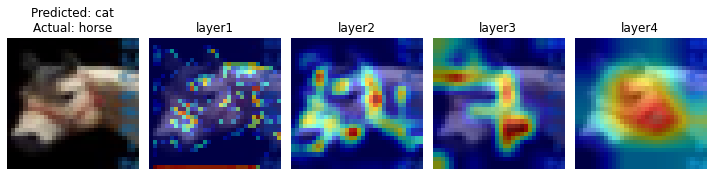

<Figure size 432x288 with 0 Axes>

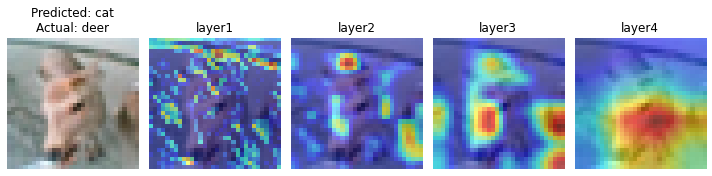

<Figure size 432x288 with 0 Axes>

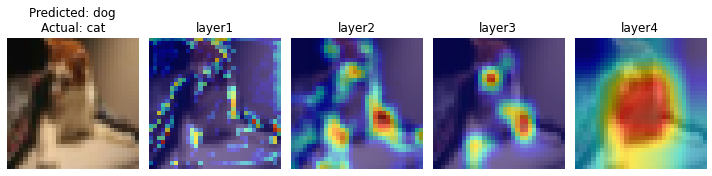

<Figure size 432x288 with 0 Axes>

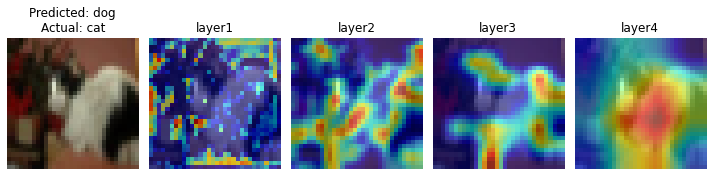

<Figure size 432x288 with 0 Axes>

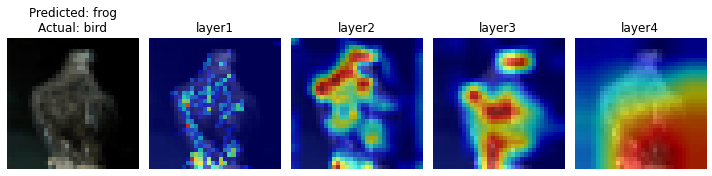

<Figure size 432x288 with 0 Axes>

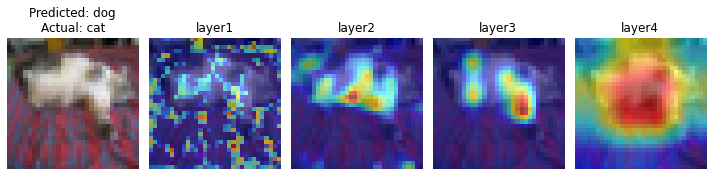

<Figure size 432x288 with 0 Axes>

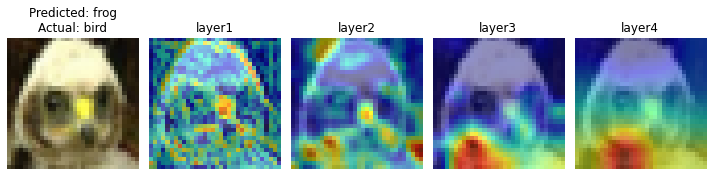

<Figure size 432x288 with 0 Axes>

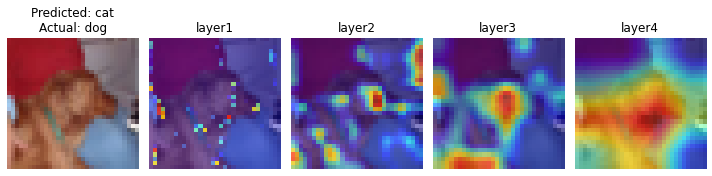

<Figure size 432x288 with 0 Axes>

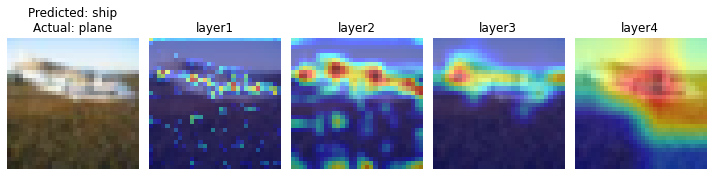

<Figure size 432x288 with 0 Axes>

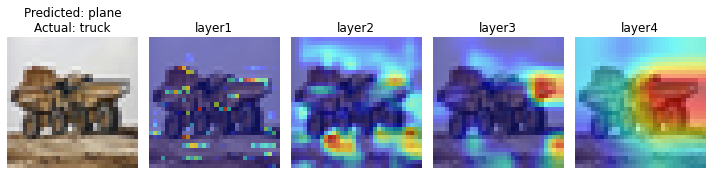

<Figure size 432x288 with 0 Axes>

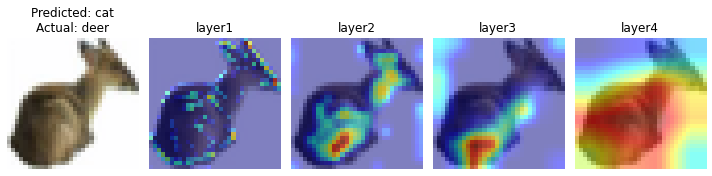

<Figure size 432x288 with 0 Axes>

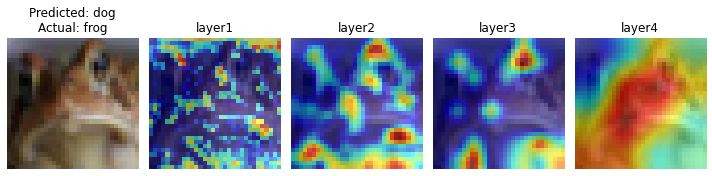

<Figure size 432x288 with 0 Axes>

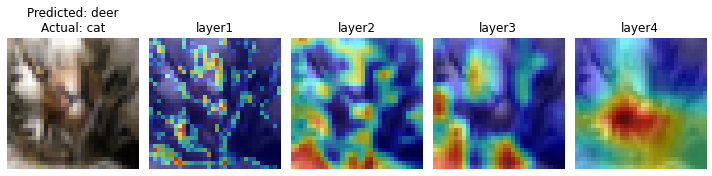

<Figure size 432x288 with 0 Axes>

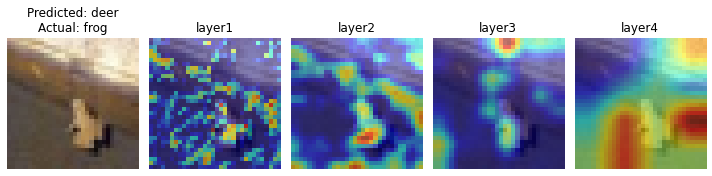

<Figure size 432x288 with 0 Axes>

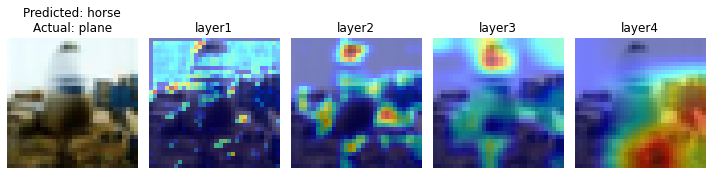

<Figure size 432x288 with 0 Axes>

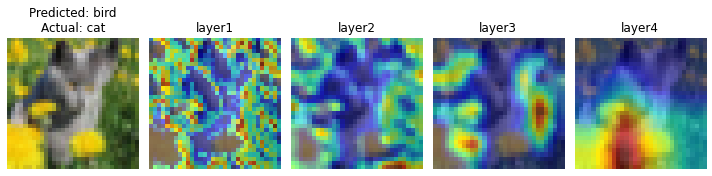

<Figure size 432x288 with 0 Axes>

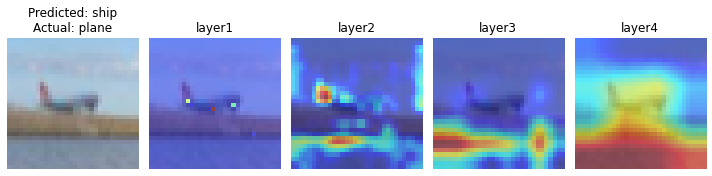

<Figure size 432x288 with 0 Axes>

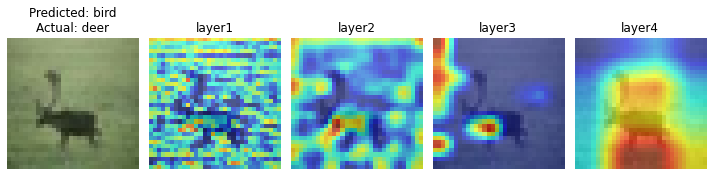

<Figure size 432x288 with 0 Axes>

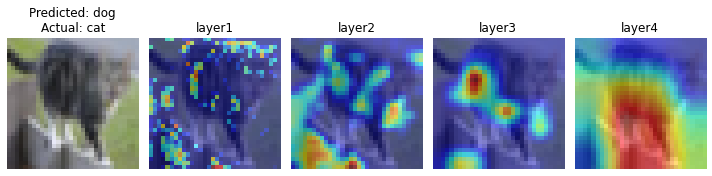

<Figure size 432x288 with 0 Axes>

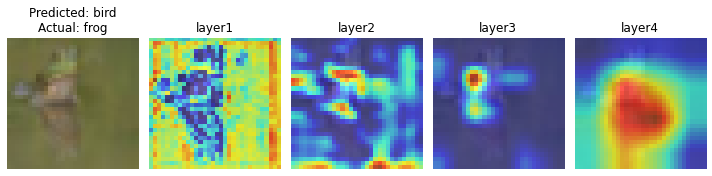

<Figure size 432x288 with 0 Axes>

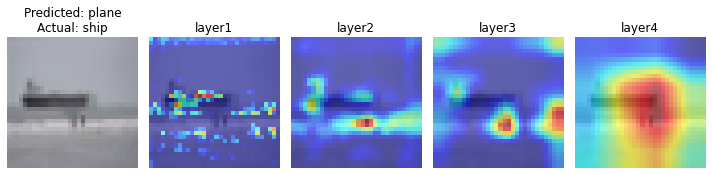

<Figure size 432x288 with 0 Axes>

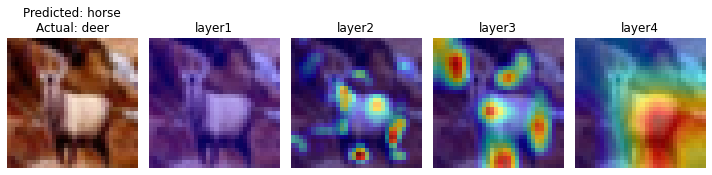

<Figure size 432x288 with 0 Axes>

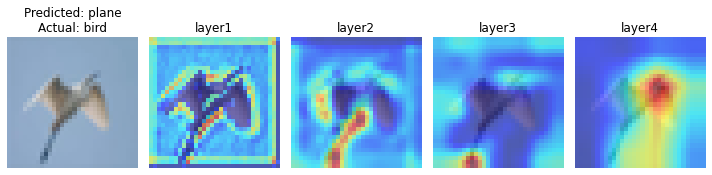

<Figure size 432x288 with 0 Axes>

In [45]:
gradcam_inst = GradDisplay(net, ['layer1', 'layer2', 'layer3', 'layer4'],device, mean, std, pred, targ)
gradcam_inst(images, 'grad_cam', True)